In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.designs.design_multiplanar import MultiPlanar
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
# ?metal.qlibrary.core.QComponent.add_qgeometry

In [3]:
# dir(QComponent)
design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

In [25]:
import numpy as np

def positions_list(num_obj, gap_between_obj, unit):
    """
    Generates a list of equally spaced positions

    Parameters:
        num_obj (int): The number of objects.
        gap_between_obj (float): The gap between each object.
        unit (str): The unit of measurement for the positions.

    Returns:
        (list): A list of positions as strings with the unit of measurement.
    """
    return_pos_list = [i*gap_between_obj for i in range(num_obj)]
    return_array = np.array(return_pos_list)
    if bool(int(num_obj) % 2 == 0):  #if even number of objects...
        return_array = return_array - gap_between_obj / 2
        return_array = return_array - (num_obj/2 - 1) * gap_between_obj
    else: #if odd number of objects...
        return_array = return_array - (num_obj/2 - 0.5) * gap_between_obj
    
    return [str(num)+str(unit) for num in return_array]  

In [27]:
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

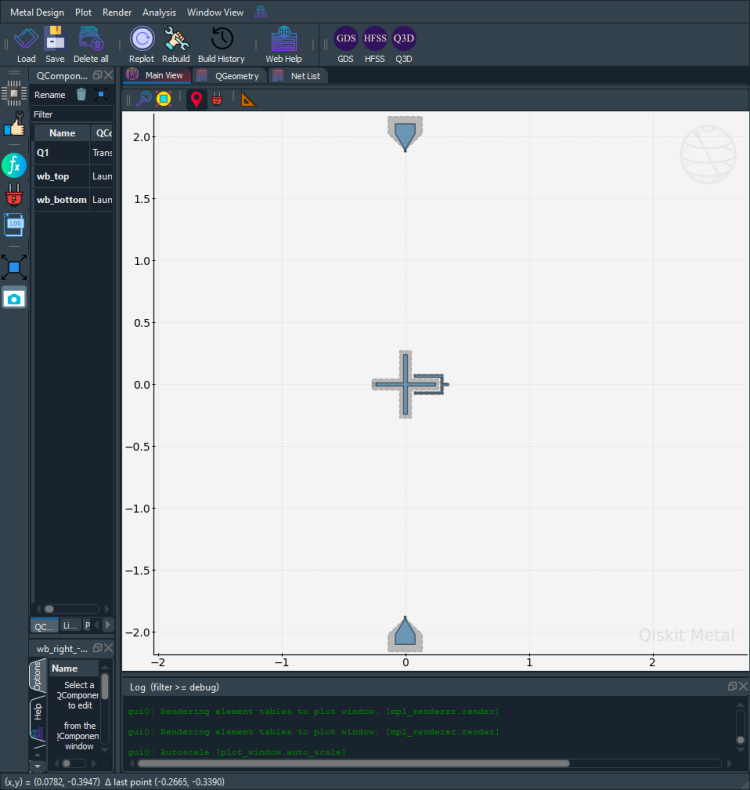

In [32]:
### Top and Bottom
options = Dict(
    orientation = -90,
    pos_y = 2.5 - 0.6,
    pad_width = '160um',
    pad_length = '200um',
    tapper_height = '200um'
)
LaunchpadWirebond(design, 'wb_top', options=options)

options = Dict(
    orientation = 90,
    pos_y = -2.5 + 0.6,
    pad_width = '160um',
    pad_length = '200um',
    tapper_height = '200um'
)
LaunchpadWirebond(design, 'wb_bottom', options=options)

In [4]:
class ATransmonCross(QComponent):
    """
    Use this class as a template for your components - have fun

    Description:

    Options:
    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(x_len = '500um',
                           y_len = '500um',
                           width = '50um',
                           pos_x='0um',
                           pos_y='0um',
                           orientation='0',
                           layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='component',
                             _qgeometry_table_poly='True')
    """Component metadata"""

    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        # EDIT HERE - Replace the following with your code
        # Create some raw geometry
        # Use autocompletion for the `draw.` module (use tab key)
        rect_x = draw.rectangle(p.x_len, p.width, p.pos_x, p.pos_y)
        rect_y = draw.rectangle(p.width, p.y_len, p.pos_x, p.pos_y)
        i_cross = rect_x.union(rect_y)

        rect_x_o = draw.rectangle()

        geom = {'inner_cross': i_cross}
        self.add_qgeometry('poly', geom, layer=p.layer, subtract=False)

In [5]:
design = metal.designs.DesignPlanar()

gui = metal.MetalGUI(design)

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross

# Be aware of the default_options that can be overridden by user.
TransmonCross.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [38]:
xmon_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-1500um',
    pos_y = '1200um'
)

# Create a new Transmon Cross object with name 'Q1'
q1 = TransmonCross(design, 'Q1', options=xmon_options)

# gui.rebuild()  # rebuild the design and plot
# gui.autoscale() #resize GUI to see QComponent
# gui.zoom_on_components(['Q1']) #Can also gui.zoom_on_components([q1.name])

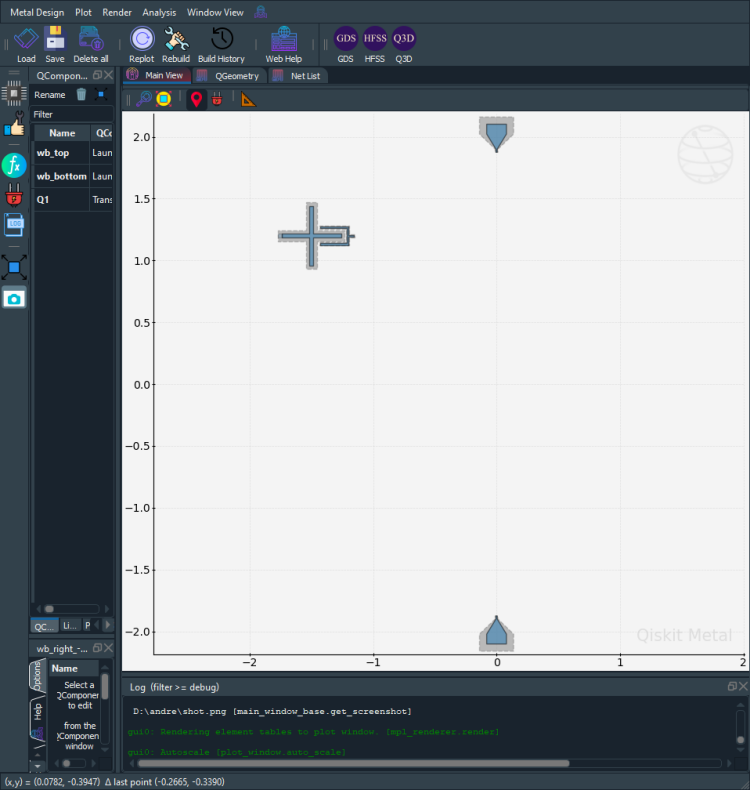

In [39]:


    
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [8]:
design.overwrite_enabled = True
